In [ ]:
!git clone https://github.com/Mike030668/Genetic_generation_net.git -q
!pip install stopit -q # установка библиотека контроля  времени

  Preparing metadata (setup.py) ... done


In [ ]:
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  import os
  os.chdir('/content/Genetic_generation_net')
  os.getcwd()

else:
  print('Not running on CoLab')

Running on CoLab


In [ ]:
from block_net.bricks import Set_net, Make_blocks
from block_net.constructor import WildregressModel
import numpy as np       # библиотека нампи
import random as random  # Импортируем модель randim
import tensorflow as tf  # библиотека машинного обучения

In [ ]:
q_tyblocks = 7  # возможное количество блоков
q_lays = 10       # возможное количество слоев

# словарь типов сетей
style_net = {0: 'Dense',
             1: 'Conv',
             #2: 'Recur',
             None: 'MIX'
}
activ_lays =['relu', 'elu', 'tanh', 'sigmoid', 'selu', 'softmax',
             'softplus', 'softsign', 'hard_sigmoid', 'exponential']
activ_out = ['linear','relu', 'elu']

neiro_out = 5 #y_train.shape[1]      # нужное количество входных нейроной


type_net = random.choice(list(style_net.keys()))
print(f'Бот парамметров слоев сети - {style_net[type_net]}')

# инициализируем Set_net на основе заданных парамметров
choosing_net = Set_net(type_net, activ_lays, activ_out, neiro_out)
# инициализируем класс структуры блоков на основе парраметров сети
maker_blocks = Make_blocks(choosing_net)

# генерируем бот_популяции сетей
bot_pop = maker_blocks.buildpopulbot(q_tyblocks, q_lays)
print(f'Бот структуры популяции сетей - {bot_pop}')
# генерируем из состав блоков из к-ва блоков и слоев
structure = [np.random.randint(0,bot_pop[1]) for i in range(bot_pop[0])]
print(f'Макс. кол-во слоев в каждом блоке - {structure}')
# создаем единый список блоков для популяции
blockov_list = maker_blocks.sostav_blockov(structure)
print(f'Список списков имен слоев сети - {blockov_list}')
bot = maker_blocks.buildblock_bot(blockov_list)
print(f'Бот парамметров слоев сети - {bot}')

Бот парамметров слоев сети - MIX
Бот структуры популяции сетей - [3, 10, None, 0, 8, 5, 0, 2, 0, 0]
Макс. кол-во слоев в каждом блоке - [0, 8, 3]
Список списков имен слоев сети - [[], ['Inceptionv_1D', 'SCnv1D', 'activ'], ['Conv1D_dilation_block', 'Conv1D_dilation_block', 'activ']]
Бот парамметров слоев сети - [[], [(160, 112, 224, 24, 64, 64), (1, 1, 3, 1, 3, 1), ('valid', 'valid', 'same', 'valid', 'same', 'same'), 4, 5, 'valid', 2], [8, 4, 16, 3, 1]]


In [ ]:
# запомним входную размерность для модели обучения
INSHAPE =  (25, 106) #train_datagen[0][0].shape[1:]

# инициализируем класс формирования сети
make_model = WildregressModel(INSHAPE)
# формируем модель из ботов
some_model = make_model(bot_pop,        # бот_популяции сетей
                        bot,            # бот парамметров слоев сети
                        blockov_list,   # список списков имен слоев сети
                        maker_blocks    # класс построения блоков
                        )

print()
print(bot_pop)


[3, 10, None, 0, 8, 5, 0, 2, 0, 0]


In [ ]:
# Отображение сводки модели
some_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 25, 106)]            0         []                            
                                                                                                  
 conv1d_1 (Conv1D)           (None, 25, 64)               20416     ['input_1[0][0]']             
                                                                                                  
 conv1d_3 (Conv1D)           (None, 25, 224)              71456     ['input_1[0][0]']             
                                                                                                  
 batch_normalization_1 (Bat  (None, 25, 64)               256       ['conv1d_1[0][0]']            
 chNormalization)                                                                             

In [ ]:
trainable_count = np.sum([tf.keras.backend.count_params(w) for w in some_model.trainable_weights])
non_trainable_count = np.sum([tf.keras.backend.count_params(w) for w in some_model.non_trainable_weights])
trainable_count

191886

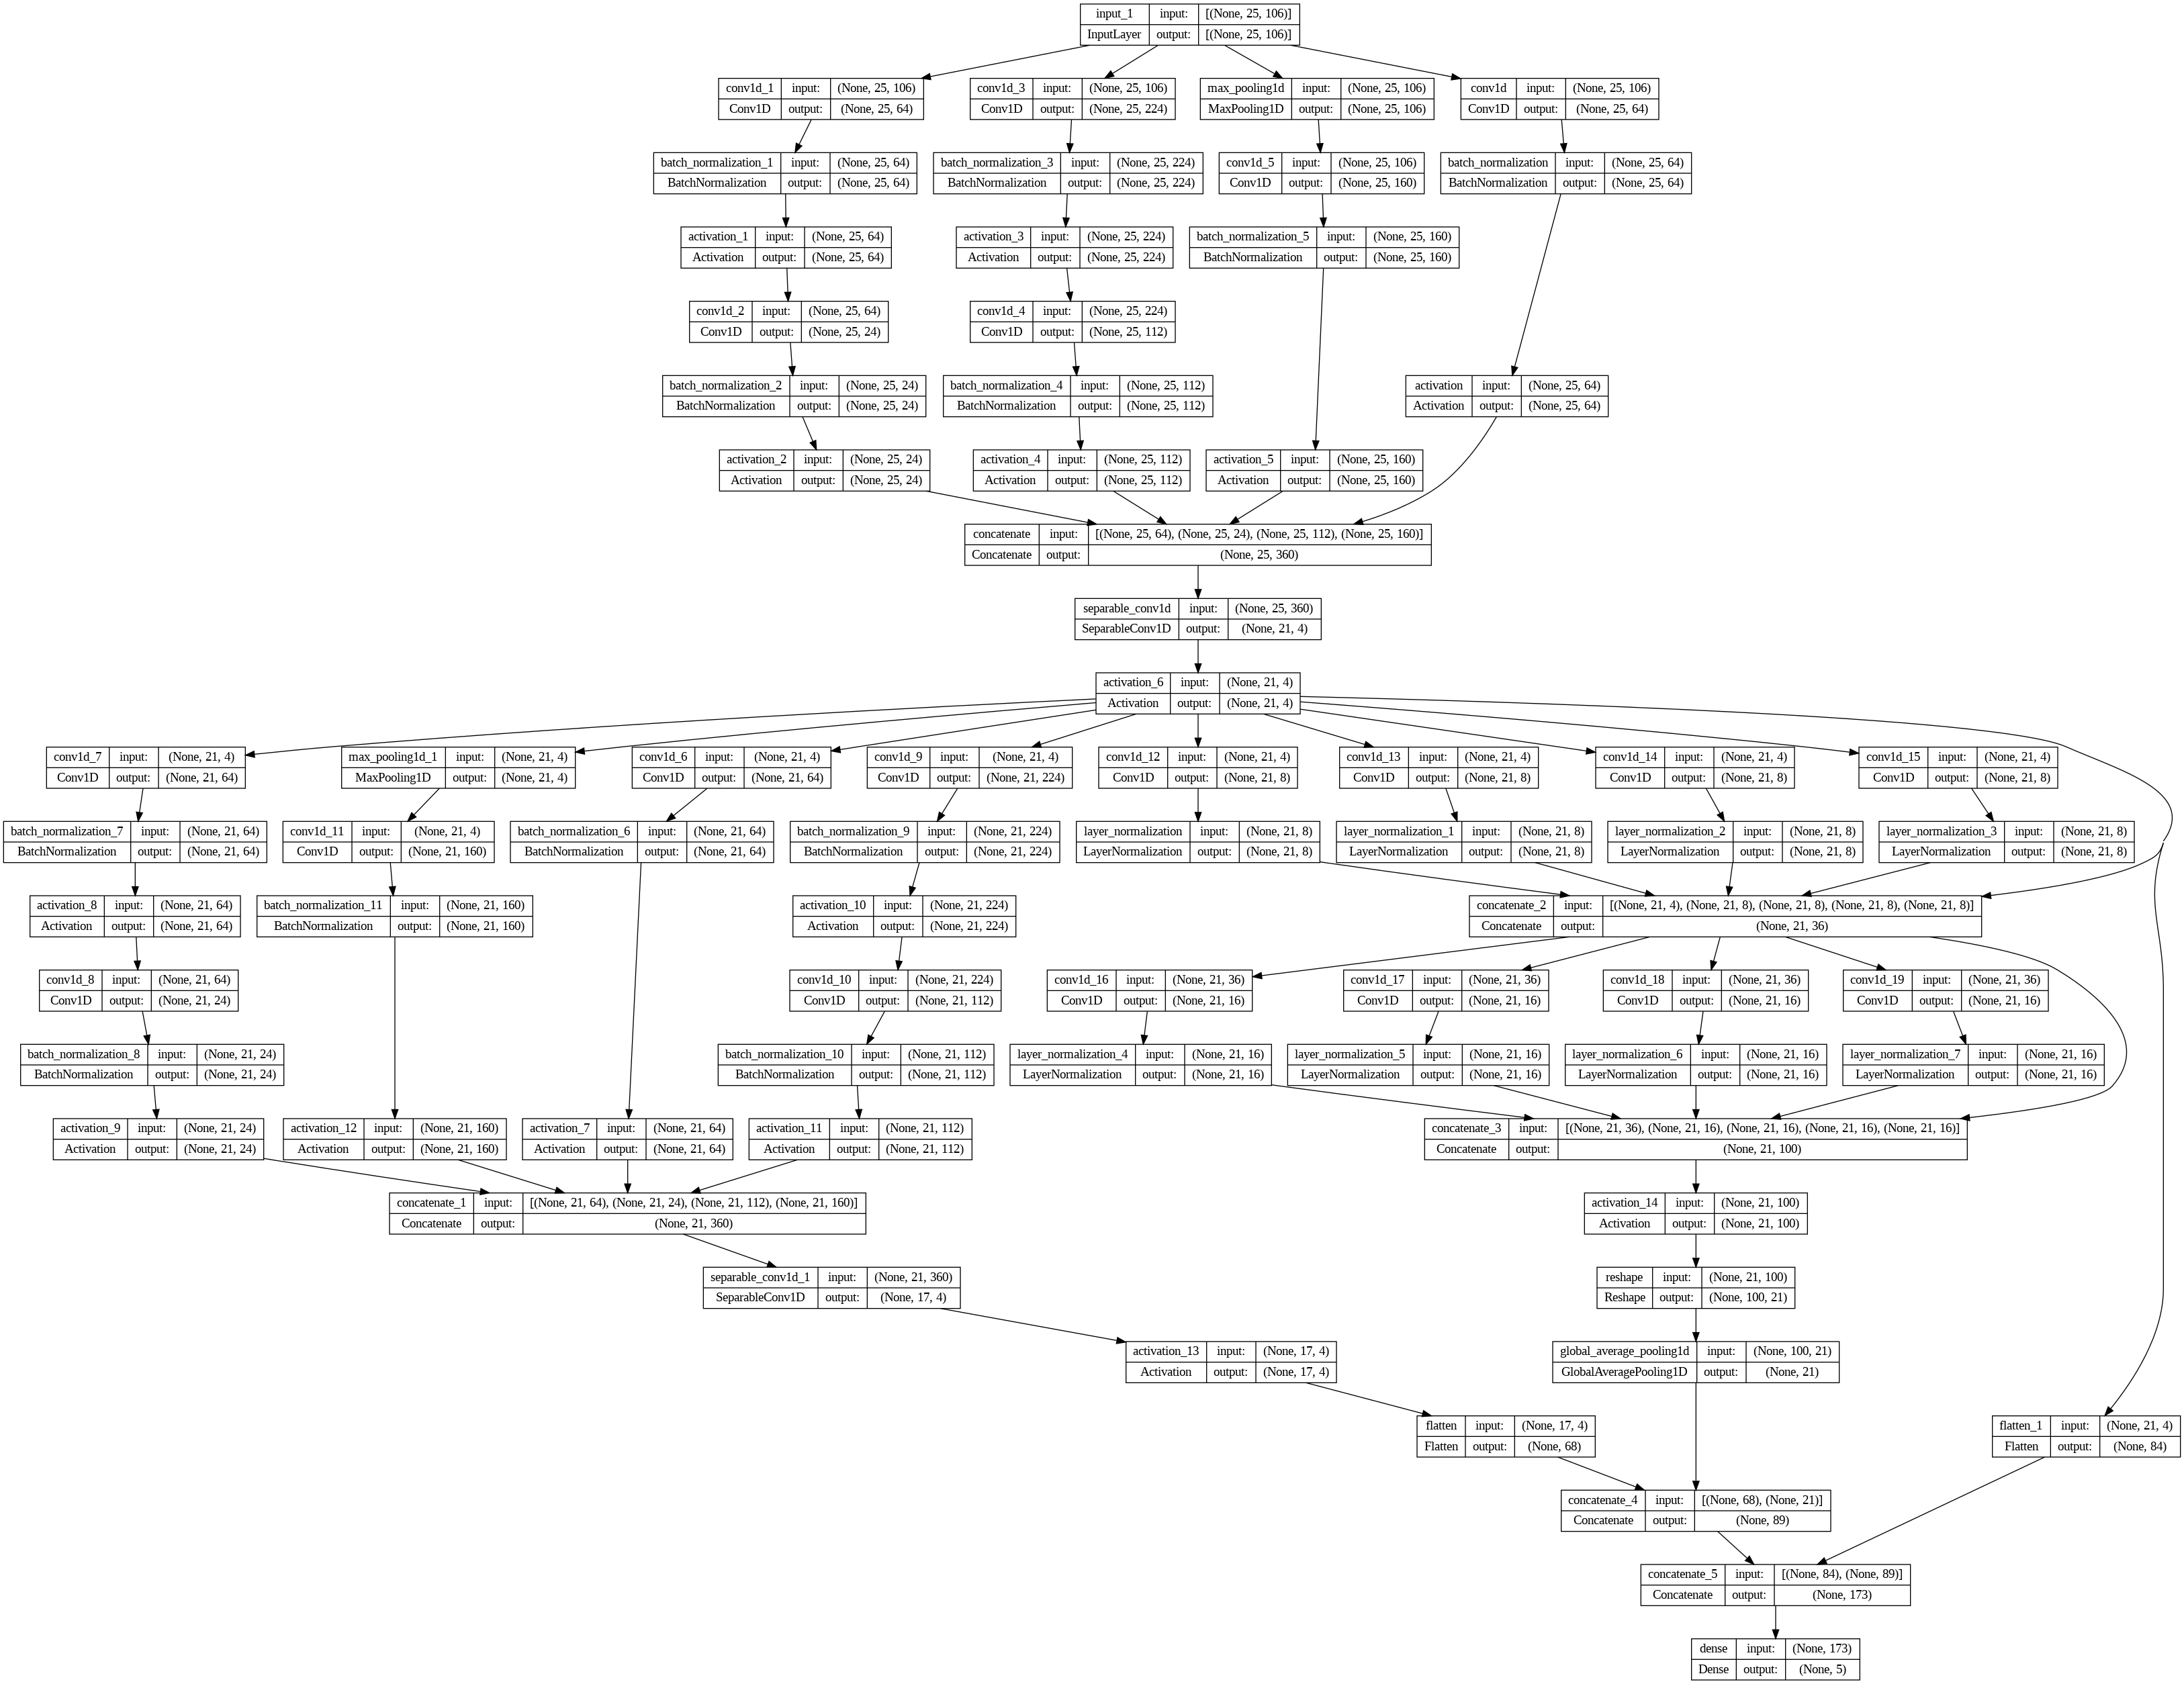

In [ ]:
tf.keras.utils.plot_model(some_model, show_shapes=True)